# Task 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data and dropping categorical columns


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs we create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'/Users/maitran/Documents/Grad Rate NY 2022'

In [4]:
# Import clean data
df= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'county_rec_cleaned.csv'), index_col = 0)

In [5]:
df.shape

(159407, 12)

In [6]:
df.head()

,county_name,membership_desc,subgroup_name,enroll_count,grad_count,local_count,regents_diploma_count,regents_advanced_count,non_diploma_credential_count,still_enroll_count,ged_count,dropout_count
1103,Albany,2016 Total Cohort - 6 Year Outcome,American Indian or Alaska Native,8,6.0,1.0,2.0,3.0,0.0,1.0,1.0,0.0
1104,Albany,2016 Total Cohort - 6 Year Outcome,Asian or Native Hawaiian/Other Pacific Islander,284,272.0,1.0,62.0,209.0,2.0,2.0,0.0,8.0
1105,Albany,2016 Total Cohort - 6 Year Outcome,Black or African American,651,537.0,26.0,378.0,133.0,12.0,27.0,6.0,69.0
1106,Albany,2016 Total Cohort - 6 Year Outcome,Hispanic or Latino,247,200.0,12.0,117.0,71.0,5.0,5.0,2.0,35.0
1108,Albany,2016 Total Cohort - 6 Year Outcome,Multiracial,102,88.0,1.0,46.0,41.0,0.0,2.0,0.0,12.0


In [7]:
# Remove the categorical columns from the data
df.drop(["subgroup_name", "county_name", "membership_desc"], axis=1, inplace=True)


In [8]:
df.columns

Index(['enroll_count', 'grad_count', 'local_count', 'regents_diploma_count',
       'regents_advanced_count', 'non_diploma_credential_count',
       'still_enroll_count', 'ged_count', 'dropout_count'],
      dtype='object')

## 2. The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-7879132025.747148,
 -2819323118.7486405,
 -1586040396.9339538,
 -1155177184.1543927,
 -922339144.142101,
 -794745295.5415326,
 -691583257.6455941,
 -595371901.3385334,
 -532731740.7088104]

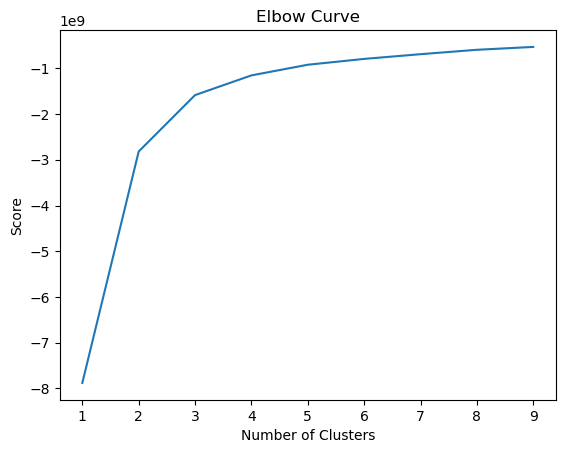

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Observation: There's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for our clusters is three.

## 3. K-means clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [14]:
df['clusters'] = kmeans.fit_predict(df)

In [15]:
df.head()

,enroll_count,grad_count,local_count,regents_diploma_count,regents_advanced_count,non_diploma_credential_count,still_enroll_count,ged_count,dropout_count,clusters
1103,8,6.0,1.0,2.0,3.0,0.0,1.0,1.0,0.0,0
1104,284,272.0,1.0,62.0,209.0,2.0,2.0,0.0,8.0,2
1105,651,537.0,26.0,378.0,133.0,12.0,27.0,6.0,69.0,1
1106,247,200.0,12.0,117.0,71.0,5.0,5.0,2.0,35.0,2
1108,102,88.0,1.0,46.0,41.0,0.0,2.0,0.0,12.0,0


In [16]:
df['clusters'].value_counts()

0    126431
2     26359
1      6617
Name: clusters, dtype: int64

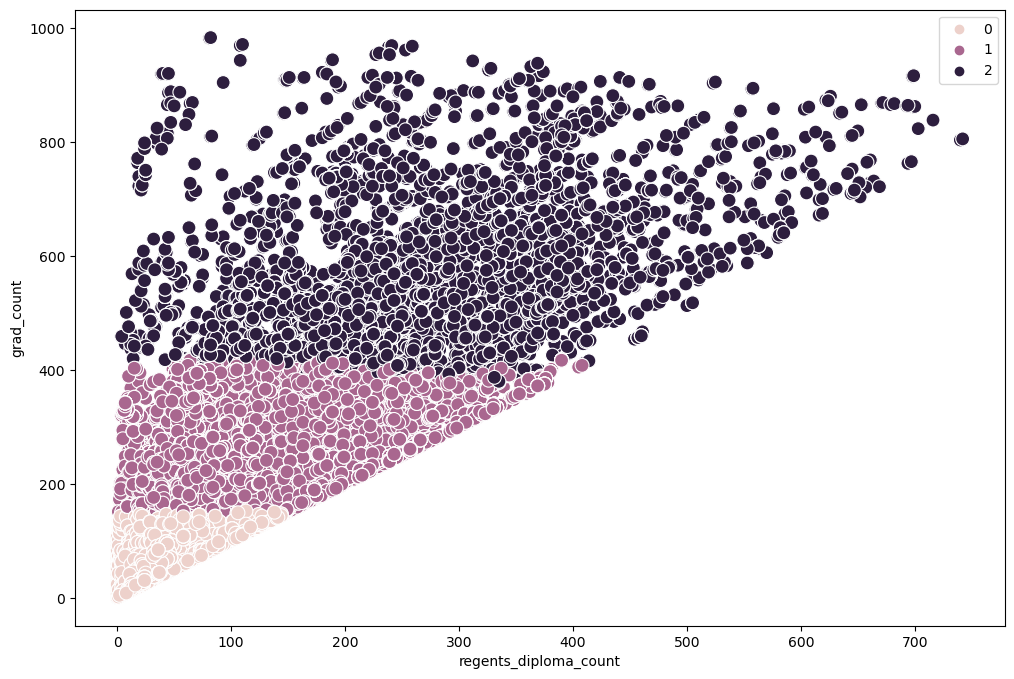

In [19]:
# Plot the clusters for the "regents_diploma_count" and "grad_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['regents_diploma_count'], y=df['grad_count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('regents_diploma_count') # Label x-axis.
plt.ylabel('grad_count') # Label y-axis.
plt.show()

Observations: There is a strong positive relationship between these two variables. For instance, if we look at the cluster 0 (pink dots), we can see that if the regents_diploma_count is low, the grad_count is also low, which makes a lot of sense as students don't meet the requirement of NY standart test to graduate.

In [17]:
# Export df with cluster
df.to_excel(os.path.join(path, '02 Data','Prepared Data', 'countiees with cluster.xlsx'))

In [18]:
df.head()

,enroll_count,grad_count,local_count,regents_diploma_count,regents_advanced_count,non_diploma_credential_count,still_enroll_count,ged_count,dropout_count,clusters
1103,8,6.0,1.0,2.0,3.0,0.0,1.0,1.0,0.0,0
1104,284,272.0,1.0,62.0,209.0,2.0,2.0,0.0,8.0,2
1105,651,537.0,26.0,378.0,133.0,12.0,27.0,6.0,69.0,1
1106,247,200.0,12.0,117.0,71.0,5.0,5.0,2.0,35.0,2
1108,102,88.0,1.0,46.0,41.0,0.0,2.0,0.0,12.0,0


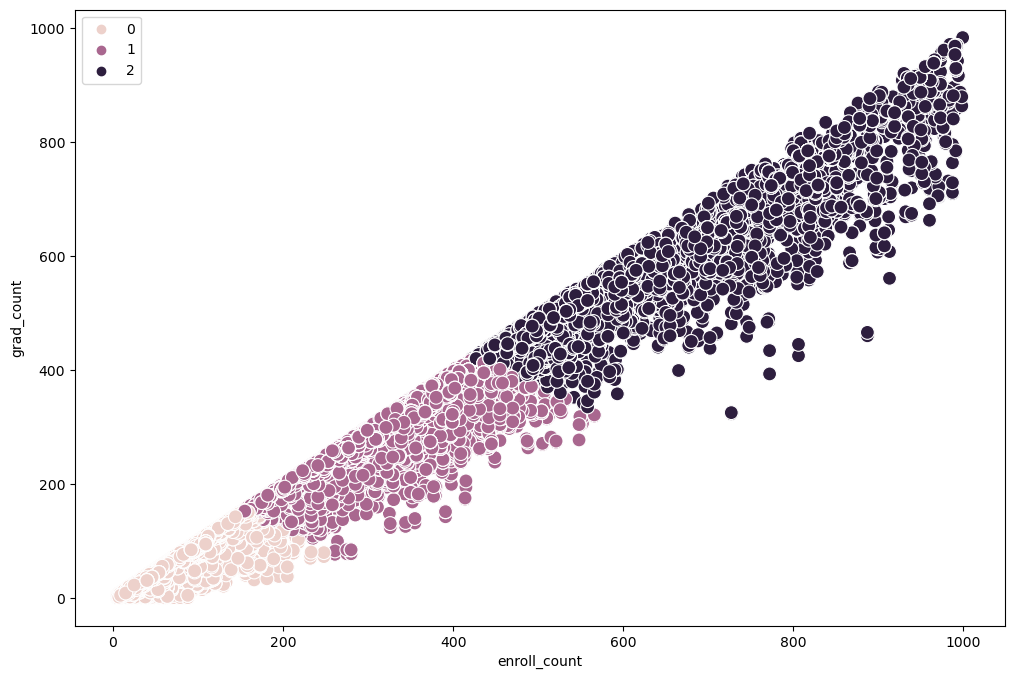

In [20]:
# Plot the clusters for the "enroll_count" and "grad_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['enroll_count'], y=df['grad_count'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('enroll_count') 
plt.ylabel('grad_count') 
plt.show()

Observations: There is a strong positive relationship between these two variables. For instance, if we look at the cluster 2 (dark purple dots), we can see that if the enroll_count is high, the grad_count is also hight, which makes a lot of sense.

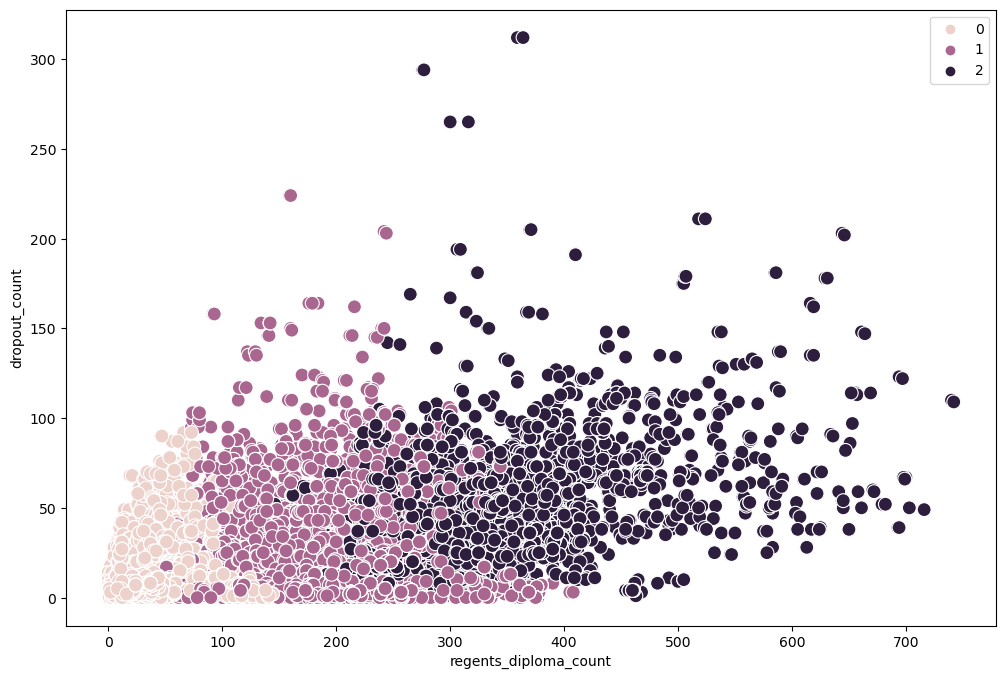

In [21]:
# Plot the clusters for the "regents_diploma_count" and "dropout_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['regents_diploma_count'], y=df['dropout_count'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('regents_diploma_count') 
plt.ylabel('dropout_count') 
plt.show()

Observations: Look like there is no strong relationship between these two variables. The drop out cout is quite similar across 3 clusters, doesn't matter if the regent_diploma_count is low or high.

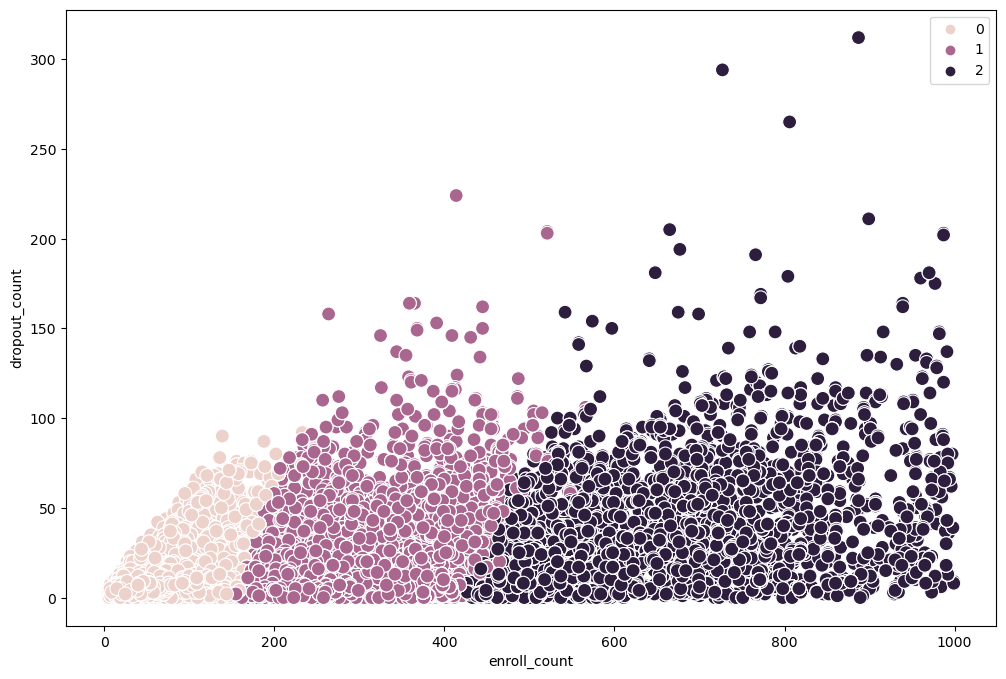

In [22]:
# Plot the clusters for the "enroll_count" and "dropout_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['enroll_count'], y=df['dropout_count'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('enroll_count') 
plt.ylabel('dropout_count') 
plt.show()

Observations: Look like there is a relationship between these two variables. When the enroll count is low, the dropout_count is low as well (cluster 0 - pink dots). But when the enroll_count is high, the dropout_count also increases (cluster 2 - dark purple dots)

In [23]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [27]:
df.groupby('cluster').agg({'enroll_count':['mean', 'median'], 
                         'grad_count':['mean', 'median'], 
                         'local_count':['mean', 'median'],
                          'regents_diploma_count':['mean', 'median'],
                          'regents_advanced_count':['mean', 'median'], 
                         'non_diploma_credential_count':['mean', 'median'],
                          'still_enroll_count':['mean', 'median'],
                        'ged_count':['mean', 'median'],
                         'dropout_count':['mean', 'median']})    
    

enroll_count         grad_count        local_count         \
                    mean median        mean median        mean median   
cluster                                                                 
dark purple   631.304821  596.0  567.491310  535.0    7.259937    3.0   
pink           55.478538   47.0   48.436429   40.0    1.305308    0.0   
purple        265.878818  253.0  242.543385  232.0    3.595477    1.0   

            regents_diploma_count        regents_advanced_count         \
                             mean median                   mean median   
cluster                                                                  
dark purple            253.802781  243.0             306.428593  299.0   
pink                    28.763369   22.0              18.367752   10.0   
purple                 108.248018   95.0             130.699890  127.0   

            non_diploma_credential_count        still_enroll_count         \
                                    mean median               mean median   
cluster                                                                     
dark purple                     3.533928    2.0          22.804443   13.0   
pink                            0.420056    0.0           2.279539    1.0   
purple                          1.456425    0.0           7.796183    4.0   

            ged_count        dropout_count         
                 mean median          mean median  
cluster                                            
dark purple  3.914009    1.0     33.284570   25.0  
pink         0.414465    0.0      3.885164    2.0  
purple       1.530675    0.0     12.450886    7.0